<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/data_collection_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting spu google drive
from google.colab import drive
drive.mount('/content/drive')

########################################

#changing the working directory
import os
os.chdir("/content/drive/MyDrive/EV Charging Station Data")

!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EV Charging Station Data


### EV - Market Analysis and Consumer Behavior

This notebook is for exploring  various datasets conducting preliminary exploratory data analysis (EDA) with the objective of understanding if they are suitable for analyzing the Electric Vehicle (EV) market and discerning consumer behavior trends.


> - Data Collection and Integration: Acquisition and integration of different datasets relevant to the EV market and consumer behavior. (datasets may include information on EV sales, charging infrastructure, government incentives, demographic data, consumer surveys, and possibly other related metrics)
> - Data Cleaning and Preparation: Cleaning and preprocessing the collected datasets to ensure data quality and consistency.
> - Preliminary EDA: Conducting the EDA to gain insights into the characteristics and patterns within the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import math

The first dataset that we are going to look at is the **Global Electric Vehicle Market Share** downloaded from [data.world](https://data.world/makeovermonday/2023w7/workspace/file?filename=Global+Electric+Vehicle+Market+Share.xlsx)


Data Source: [Counterpoint Research](https://www.counterpointresearch.com/insights/global-electric-vehicle-market-share/)

In [3]:
data1 = pd.read_excel('https://query.data.world/s/j3zfvtlaqca6nwnhs62wfecky7rduf?dws=00000')
data1.head()

,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Wuling,0.07,0.06,0.05,0.06,0.05,0.05
3,Volkswagen,0.07,0.06,0.05,0.04,0.04,0.04
4,GAC Motor,0.02,0.02,0.02,0.02,0.03,0.03


In [4]:
data1.iloc[5] = data1.iloc[2] + data1.iloc[4]
data1.drop([2, 4], inplace=True)
data1.reset_index(drop=True, inplace=True)
data1['Brands'] = data1['Brands'].replace('WulingGAC Motor', 'Others')
data1['Brands'] = data1['Brands'].replace('Volkswagen', 'Volkswagen Group')
data1



,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Volkswagen Group,0.07,0.06,0.05,0.04,0.04,0.04
3,Others,0.09,0.08,0.07,0.08,0.08,0.08


In [5]:
data2 = pd.read_excel('/content/drive/MyDrive/EV Charging Station Data/Global EV Market Share Q4 2023.xlsx')
data2.head()

,Brands,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023
0,BYD Auto,0.10,0.12,0.13,0.15,0.14,0.15,0.17,0.18
1,Tesla,0.21,0.16,0.17,0.17,0.22,0.20,0.17,0.16
2,Volkswagen Group,0.07,0.08,0.07,0.08,0.07,0.07,0.08,0.08
3,Others,0.62,0.64,0.63,0.60,0.57,0.58,0.58,0.58


In [6]:
data = pd.merge(data1, data2, on='Brands', how='outer')
data


,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022_x,Q2 2022_x,Q3 2022_x,Q1 2022_y,Q2 2022_y,Q3 2022_y,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20,0.10,0.12,0.13,0.15,0.14,0.15,0.17,0.18
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13,0.21,0.16,0.17,0.17,0.22,0.20,0.17,0.16
2,Volkswagen Group,0.07,0.06,0.05,0.04,0.04,0.04,0.07,0.08,0.07,0.08,0.07,0.07,0.08,0.08
3,Others,0.09,0.08,0.07,0.08,0.08,0.08,0.62,0.64,0.63,0.60,0.57,0.58,0.58,0.58


In [7]:
data.drop(columns=['Q1 2022_y', 'Q2 2022_y', 'Q3 2022_y'], inplace=True)
data.columns = data.columns.str.replace('_x', '')
data.drop([3], inplace=True)
data



,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20,0.15,0.14,0.15,0.17,0.18
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13,0.17,0.22,0.20,0.17,0.16
2,Volkswagen Group,0.07,0.06,0.05,0.04,0.04,0.04,0.08,0.07,0.07,0.08,0.08


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   3 non-null      object 
 1   Q2 2021  3 non-null      float64
 2   Q3 2021  3 non-null      float64
 3   Q4 2021  3 non-null      float64
 4   Q1 2022  3 non-null      float64
 5   Q2 2022  3 non-null      float64
 6   Q3 2022  3 non-null      float64
 7   Q4 2022  3 non-null      float64
 8   Q1 2023  3 non-null      float64
 9   Q2 2023  3 non-null      float64
 10  Q3 2023  3 non-null      float64
 11  Q4 2023  3 non-null      float64
dtypes: float64(11), object(1)
memory usage: 416.0+ bytes


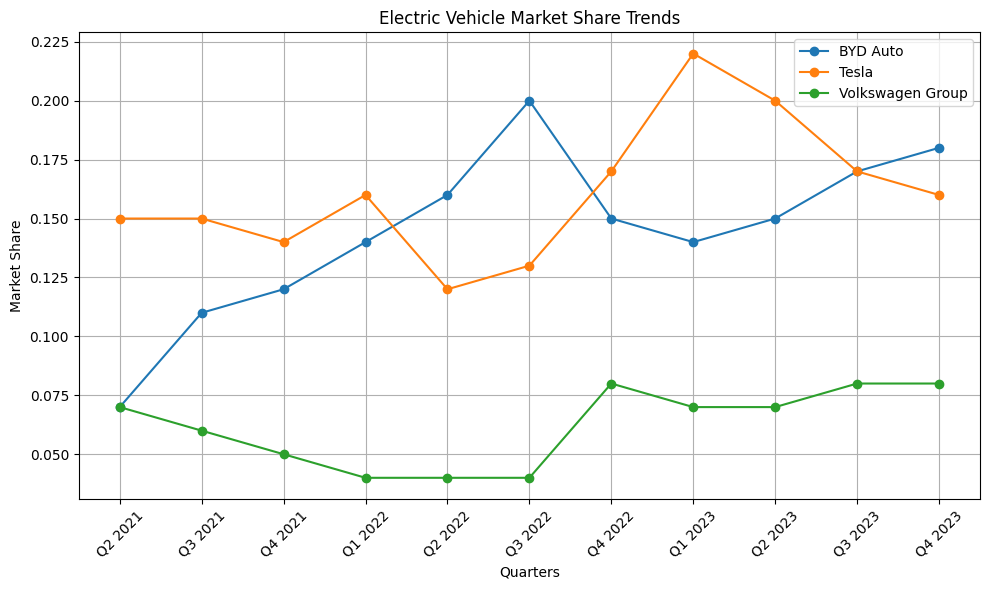

In [9]:
# Plotting market share trends for all brands
plt.figure(figsize=(10, 6))

for index, row in data.iterrows():
    plt.plot(data.columns[1:], row[1:], marker='o', label=row['Brands'])

plt.title('Electric Vehicle Market Share Trends')
plt.xlabel('Quarters')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

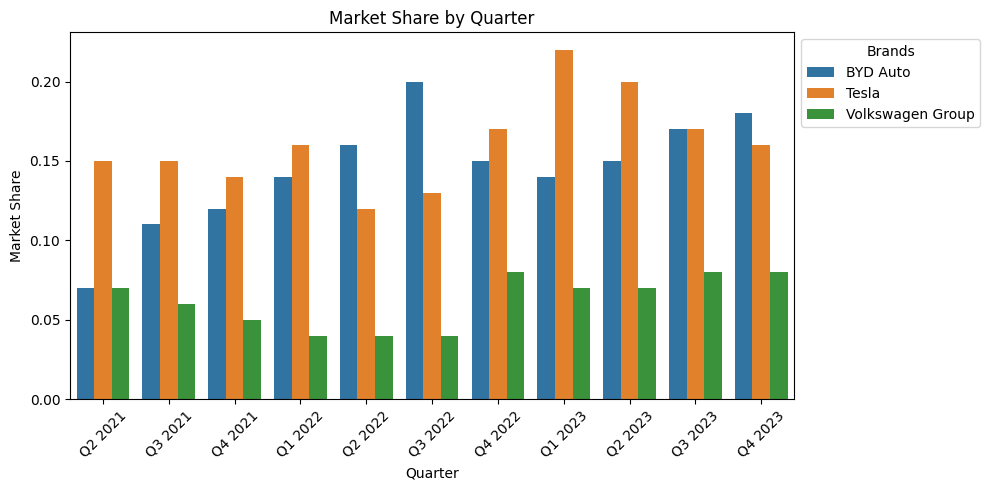

In [10]:
# Melt the data to make it suitable for a bar plot
melted_data = data.melt(id_vars=['Brands'], var_name='Quarter', value_name='Market_Share')

# Plotting bar plot of market share by quarter
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=melted_data)
plt.title('Market Share by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The above dataset basically is tracking the market share of different electric vehicle brands over several quarters from **Q2 2021** to **Q3 2022**

- **BYD Auto:** BYD Auto is a Chinese automobile manufacturer specializing in electric vehicles (EVs), batteries, and renewable energy solutions.
- **Tesla:** Tesla is an American electric vehicle and clean energy company founded by Elon Musk.

- **Volkswagen:** Volkswagen (VW) is a German automaker known for its wide range of vehicles, including electric cars.

From the above visualization, BYD at the end of **Q3 2022** emerging as the market leader, overtaking Tesla. The other takeway from the visualizations is that 3 out of the 5 top EV manufacturers are Chineses owned companies. And that the **BIG 3** Americal Automotive companies are nowhere to befound.

The dataset that we are going to look at is called **IEA Global EV Dataset** which is part of the Global EV Data Explorer, developed by the **International Energy Agency (IEA)**, provides a comprehensive view of historical and projected data related to electric vehicles (EVs).

**Data Coverage:**
- Explore information on EV sales, stock, charging infrastructure, and oil displacement.
- The data is regularly updated, with the most recent update on April 26, 2023 <br> <br>

**Data Variables Description:**
- **Region:** This column denotes the geographic region to which the data pertains. In the provided sample, the region is "Australia".
- **Category:** This column categorizes the type of data. In the sample, it includes historical data related to electric vehicle (EV) stock and EV sales.
- **Parameter:** This column specifies the specific parameter being measured or described in the dataset. Examples include "EV stock" and "EV sales share".
- **Mode:** This column indicates different modes of operation or aspects related to electric vehicles. In the sample, it includes "Cars".
- **Powertrain:** This column describes the type of powertrain used in the electric vehicles. In the sample, it includes "BEV" (Battery Electric Vehicle).
- **Year:** This column denotes the year to which the data corresponds. In the sample, it ranges from 2011 to 2012.
- **Unit:** This column specifies the unit of measurement for the corresponding 'value' variable. In the sample, it includes "Vehicles" and "percent".
- **Value:** This column contains the actual numerical values of the data being measured or described in the dataset. It represents the number of vehicles or percentages, depending on the unit specified.

In [11]:
data = pd.read_csv("IEA Global EV Data 2024.csv")
data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [13]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(data.columns):
  datatype = data[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

region  --> object
category  --> object
parameter  --> object
mode  --> object
powertrain  --> object
year  --> int64
unit  --> object
value  --> float64


In [14]:
# Explore unique values of categorical variables
print("Unique regions:", data['region'].unique())
print("Unique categories:", data['category'].unique())
print("Unique parameters:", data['parameter'].unique())
print("Unique modes:", data['mode'].unique())
print("Unique powertrains:", data['powertrain'].unique())
print("Unique years:", data['year'].unique())
print("Unique units:", data['unit'].unique())


Unique regions: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique categories: ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique parameters: ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique modes: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique powertrains: ['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCE

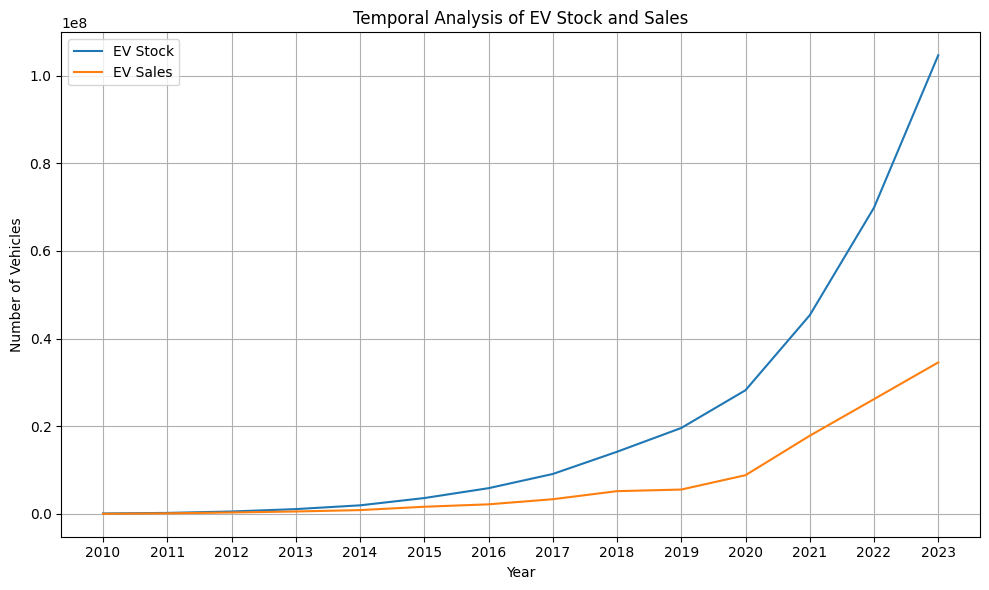

In [15]:
# Filtering data for EV stock and sales
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock.groupby('year')['value'].sum()
ev_sales_yearly = ev_sales.groupby('year')['value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()


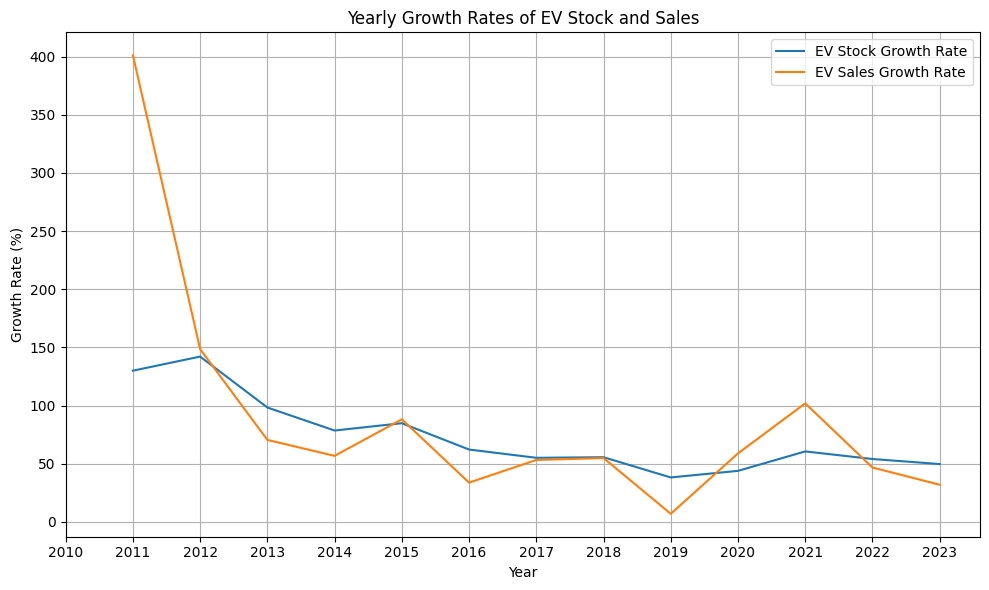

In [16]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

In [17]:
# Electricity Demand and EV Adoption

# Filtering data for Electricity Demand and EV Sales
electricity_demand = data[(data['parameter'] == 'Electricity demand') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]


fig = make_subplots(rows=1, cols=2, subplot_titles=('Electricity Demand', 'EV Sales'))

# Adding bar graphs to subplots
fig.add_trace(go.Bar(x=electricity_demand['year'], y=electricity_demand['value'], name='Electricity Demand'), row=1, col=1)
fig.add_trace(go.Bar(x=ev_sales['year'], y=ev_sales['value'], name='EV Sales'), row=1, col=2)


fig.update_layout(title='Electricity Demand and EV Adoption Over Time',
                  xaxis=dict(title='Year'),
                  yaxis=dict(title='Value'),
                  barmode='group')


fig.show()

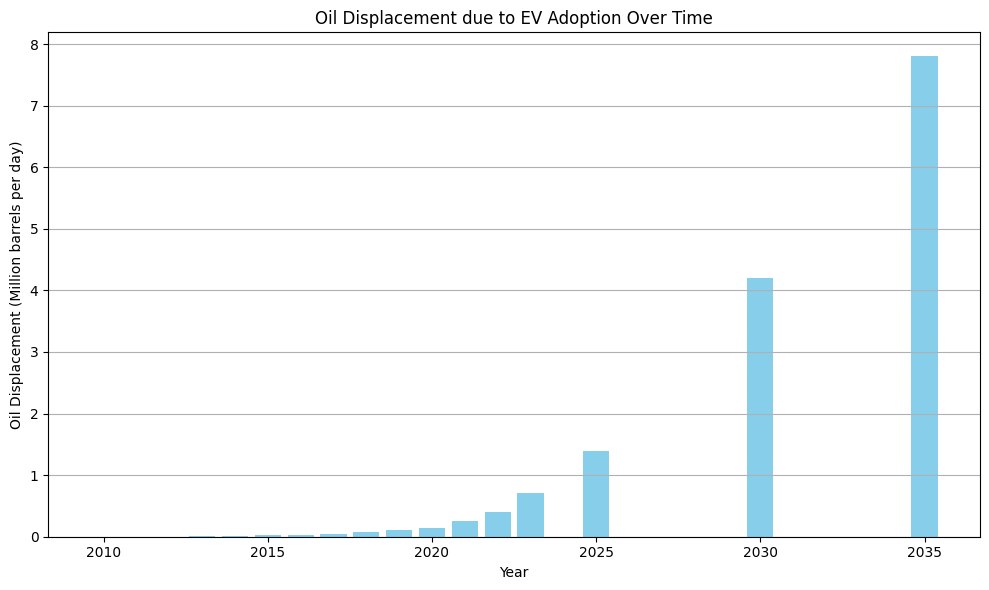

In [18]:
# Oil Displacement Over Time
oil_displacement = data[data['parameter'] == 'Oil displacement Mbd']

plt.figure(figsize=(10, 6))
plt.bar(oil_displacement['year'], oil_displacement['value'], color='skyblue')
plt.title('Oil Displacement due to EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Oil Displacement (Million barrels per day)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
# Comparing EV Adoption Across Regions

# Filtering data for EV stock
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]

# Aggregating EV stock by year and region
ev_stock_agg = ev_stock.groupby(['year', 'region'])['value'].sum().reset_index()


fig = px.bar(ev_stock_agg, x='year', y='value', color='region',
             labels={'value': 'EV Stock', 'year': 'Year'},
             title='EV Adoption Across countries Over Time',
             barmode='stack')
fig.update_layout(xaxis=dict(type='category'))
fig.show()


In [ ]:
# Filter the data for EV sales
ev_sales_data = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

def create_choropleth():
    # filtered_data = ev_sales_data.copy()

    fig = px.choropleth(ev_sales_data,
                        locations='region',
                        locationmode='country names',
                        color='value',
                        color_continuous_scale='Viridis',
                        hover_name='region',
                        projection='natural earth',
                        title='EV Sales',
                        animation_frame='year',
                        labels={'value': 'EV Sales', 'year': 'Year'},
                        )
    fig.update_layout(updatemenus=[
        dict(
            buttons=[
                dict(label='BEV',
                     method='update',
                )
                for year in ev_sales_data['powertrain'].unique()
            ],
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
        dict(
            buttons=[
                dict(label= 'Year',
                     method='animate',
                     args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}])
                for year in ev_sales_data['year'].unique()
            ],

        )
    ])

    fig.show()


create_choropleth()

In [ ]:

#Comparison of EV Sales Share Across Regions

# Filtering the data to include only rows where parameter is 'EV sales share'
ev_sales_share_data = data[data['parameter'] == 'EV sales share']

# Grouping the data by region and year, then calculating the mean sales share for each region
mean_sales_share_by_region = ev_sales_share_data.groupby(['region', 'year'])['value'].mean().reset_index()


fig = px.bar(mean_sales_share_by_region, x='year', y='value', color='region',
             title='Comparison of EV Sales Share Across Regions',
             labels={'year': 'Year', 'value': 'EV Sales Share (%)', 'region': 'Region'},
             barmode='group')

fig.show()

In [ ]:
# Distribution of Powertrain Types Over Years

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]
pivot_data = filtered_data.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum', fill_value=0)
powertrains = pivot_data.columns.tolist()

# Creatinng a bar trace for each powertrain type
traces = []
for powertrain in powertrains:
    trace = go.Bar(
        x=pivot_data.index,
        y=pivot_data[powertrain],
        name=powertrain
    )
    traces.append(trace)

# Plotting the grouped bar chart using Plotly
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
# Distribution of Powertrain Types Over Years filtered by Region

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]

# Pivot the data to get counts of each powertrain type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'powertrain'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of powertrain types
powertrains = pivot_data.columns.get_level_values('powertrain').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each powertrain type and region
traces = []
for powertrain in powertrains:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        trace = go.Bar(
            x=pivot_data.index,
            y=pivot_data[region, powertrain],
            name=region + ' - ' + powertrain,
            visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
        )
        traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
# Filter data for EV adoption by different vehicle modes
ev_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Create a stacked bar graph
fig = go.Figure()

for mode in grouped_data['mode'].unique():
    mode_data = grouped_data[grouped_data['mode'] == mode]
    fig.add_trace(go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    ))

fig.update_layout(
    barmode='stack',
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis_title='Year',
    yaxis_title='Number of Electric Vehicles',
    legend_title='Vehicle Mode'
)

fig.show()

In [ ]:
# Filter data for EV stock
ev_stock_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_stock_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Get unique modes and years
modes = grouped_data['mode'].unique()
years = grouped_data['year'].unique()

# Create a list to hold traces for each mode
traces = []

# Iterate over modes and create a trace for each mode
for mode in modes:
    mode_data = grouped_data[grouped_data['mode'] == mode]
    trace = go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Electric Vehicles'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
data['parameter'].unique()

array(['EV stock', 'EV sales share', 'EV stock share', 'EV sales',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [ ]:
# Filter data for EV stock
filtered_data = data[(data['parameter'] == 'EV sales') & (data['year'] >= 2010)]

# Pivot the data to get counts of each mode type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'mode'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of mode types
modes = pivot_data.columns.get_level_values('mode').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each mode type and region
traces = []
for mode in modes:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        if (region, mode) in pivot_data.columns:
            trace = go.Bar(
                x=pivot_data.index,
                y=pivot_data[region, mode],
                name = mode,
                visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
            )
            traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

Dataset1: The role of gender in consumer markets for electric vehicles - https://datadryad.org/stash/dataset/doi:10.25338/B80P8D

Data Description:

- Data sourced from households who purchased at least one new household vehicle since January 2008
- Questionnaire administered online
- Survey conducted in specific US states: California, Connecticut, Delaware,Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Oregon, Rhode Island, Vermont, and Washington
- Most states are "ZEV states" following California's Zero Emission Vehicle (ZEV) Mandate
- Non-ZEV states included for regional analysis or significance to the initial launch of retail ZEV sales in 2011
- Primary regional analysis focused on Northeast States for Coordinated Air Use Management (NESCAUM)
- NESCAUM member states: Connecticut, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, and Vermont
- Total sample size: 5,654 across all states

In [ ]:
#lets read the datasets into pandas dataframes:
CA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863279")
DE_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863280")
MA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863281")
MD_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863284")
NJ_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863285")
NY_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863288")
OR_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863289")
WA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863293")



### **Data Cleaning**:

We need to clean out the dataset, removing a bunch of columns that are not going to be usefull for our analylsis and the unsupervised exploratory data analysis. Afterwards, we are also going to also currate the variable descriptions from the JMP files to the CSV here in the jupyter notebook.

In [ ]:
#lets just take a look the CA_dataset

CA_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,40,HEV,NaN,NaN,NaN,HEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,0.0,0.0,0.0,5.490969,5.490969,0.0,0.0,0.0,0.0,NaN
1,36,HEV,NaN,NaN,NaN,HEV,College Graduate,College Graduate,Male,Male,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,32,PHEV,NaN,NaN,NaN,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,48,EV,NaN,NaN,NaN,EV,High School Graduate or GED,High school or less,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,50,EV,NaN,NaN,NaN,EV,Some Graduate School,Some Graduate School,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
#for this dataset, lets take a look at the number of columns/variables and rows/records we are working with
CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB


In [ ]:
#lets take a look at the rows and columns of all the datasets:
# Print info for each dataset
print("CA_dataset info:")
print(CA_dataset.info())
print("\nDE_dataset info:")
print(DE_dataset.info())
print("\nMA_dataset info:")
print(MA_dataset.info())
print("\nMD_dataset info:")
print(MD_dataset.info())
print("\nNJ_dataset info:")
print(NJ_dataset.info())
print("\nNY_dataset info:")
print(NY_dataset.info())
print("\nOR_dataset info:")
print(OR_dataset.info())
print("\nWA_dataset info:")
print(WA_dataset.info())

CA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB
None

DE_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 190 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(149), int64(2), object(39)
memory usage: 297.0+ KB
None

MA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 192 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(153), int64(1), object(38)
memory usage: 747.1+ KB
None

MD_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Columns: 194 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(155), int64(2), object(37)
memory usage: 600.3+ KB
None

NJ_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 

From the above, we can see that we have varying number of variable in the datasets. So before we start cleaningout the datasets and mearging them, it would be best to know the unique variables that are not available in other dataset and the common columns/variables in all the datasets.

In [ ]:
# We are going to create 2 list of column names, common colums among all the datasets and non-common columns

# Extract column names
column_names = {
    "CA": set(CA_dataset.columns),
    "DE": set(DE_dataset.columns),
    "MA": set(MA_dataset.columns),
    "MD": set(MD_dataset.columns),
    "NJ": set(NJ_dataset.columns),
    "NY": set(NY_dataset.columns),
    "OR": set(OR_dataset.columns),
    "WA": set(WA_dataset.columns)
}

# Common column names
common_columns = set.intersection(*column_names.values())

# Columns not common in all datasets
not_common_columns = set.union(*column_names.values()) - common_columns

In [ ]:
#for each not common column name, we are going to print out the datasets it's in:

for column in not_common_columns:
    print(f"\nColumn: {column}")
    for dataset, columns in column_names.items():
        if column in columns:
            print(f"- Dataset: {dataset}")


Column: Envi Factor1: AP regional personal imp
- Dataset: WA

Column: rConsiderEV
- Dataset: CA
- Dataset: NJ
- Dataset: NY

Column: Envi Factor2: CC GW imp
- Dataset: WA

Column: Consider an EV y/n
- Dataset: DE

Column: Enviro Factor1b
- Dataset: CA

Column: Driving Exp Factor2: FCV EV imp
- Dataset: NJ

Column: Electric Parking
- Dataset: DE

Column: Prior FCV Factor4: public imp
- Dataset: MD

Column: Prior FCV Factor1
- Dataset: CA

Column: Electricy install authority 2
- Dataset: NY

Column: Driving Exp Factor1: ZEV HEV imp
- Dataset: DE

Column: Prior FCV Factor1: range time public imp
- Dataset: MA
- Dataset: NY

Column: rHhld Income
- Dataset: NY

Column: Fuel economy, gasoline / diesel / ethanol
- Dataset: CA
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NY
- Dataset: OR
- Dataset: WA

Column: Prior EV Factor2
- Dataset: CA

Column: Prior FCV Factor3: price -public imp
- Dataset: DE

Column: Envi Factor1: AP CC GW imp
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Datase

We are not going to give much attention to the uncommon variable

We are going to remove the truncated columns and some columns that we dont have any use of

In [ ]:
# Filter out column names containing "(trunc)"
common_columns_filtered = [col for col in common_columns if "(trunc)" not in col]


# List of variables to remove
variables_to_remove = [
    'Base body size',
    'No Trucks, Plus Incentives: drivetrain design 1',
    'No Trucks, Plus Incentives: drivetrain design 2',
    'No Trucks, Plus Incentives: drivetrain design 3',
    'No Trucks, Plus Incentives: drivetrain design 4',
    'FCV: fueling time',
    'Consider an FCV',
    'Driving exp: FCV',
    'Familiarity: FCVs',
    'FCV: public refueling',
    'FCV: purchase price',
    'FCV: range',
    'FCV: reliability',
    'FCV: safety',
    'w Non-ZEV: battery concerns',
    'w Non-ZEV: charge/fuel time',
    'w Non-ZEV: electricity supply',
    'w Non-ZEV: environmental concerns',
    'w Non-ZEV: fuel cost',
    'w Non-ZEV: fuel safety',
    'w Non-ZEV: higher incentives',
    'w Non-ZEV: impression',
    'w Non-ZEV: lifestyle',
    'w Non-ZEV: limited fuel network',
    'w Non-ZEV: looks',
    'w Non-ZEV: maintenance cost',
    'w Non-ZEV: no home charge or fuel',
    'w Non-ZEV: purchase cost',
    'w Non-ZEV: range',
    'w Non-ZEV: reliability',
    'w Non-ZEV: unfamiliar technology',
    'w Non-ZEV: vehicle safety',
    'w Pro-ZEV: air quality',
    'w Pro-ZEV: climate change',
    'w Pro-ZEV: comfortable',
    'w Pro-ZEV: fuel cost',
    'w Pro-ZEV: fun',
    'w Pro-ZEV: home charge convenience',
    'w Pro-ZEV: impression',
    'w Pro-ZEV: incentives',
    'w Pro-ZEV: lifestyle',
    'w Pro-ZEV: looks',
    'w Pro-ZEV: maintenance cost',
    'w Pro-ZEV: money to oil producers',
    'w Pro-ZEV: oil imports',
    'w Pro-ZEV: purchase cost',
    'w Pro-ZEV: safer',
    'w Pro-ZEV: tech',

]

# Filter out variables to remove from common_columns_filtered
common_columns_filtered = [col for col in common_columns_filtered if col not in variables_to_remove]

# Sort common_columns_filtered alphabetically
common_columns_filtered.sort()

# Move 'Response ID..' to the beginning of the list
common_columns_filtered.insert(0, common_columns_filtered.pop(common_columns_filtered.index('Response ID..')))


In [ ]:
# Lets first filter the datasets to only havr the common variables
CA_dataset = CA_dataset[list(common_columns_filtered)]
DE_dataset = DE_dataset[list(common_columns_filtered)]
MA_dataset = MA_dataset[list(common_columns_filtered)]
MD_dataset = MD_dataset[list(common_columns_filtered)]
NJ_dataset = NJ_dataset[list(common_columns_filtered)]
NY_dataset = NY_dataset[list(common_columns_filtered)]
OR_dataset = OR_dataset[list(common_columns_filtered)]
WA_dataset = WA_dataset[list(common_columns_filtered)]


CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 94 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID..                                       1671 non-null   int64  
 1   Air pollution: lifesyle                             1671 non-null   float64
 2   Air pollution: personal worry                       1671 non-null   float64
 3   Air pollution: regional threat                      1671 non-null   float64
 4   Base body size 2                                    1653 non-null   object 
 5   Climate change: lifestyle                           1523 non-null   float64
 6   Commute                                             1671 non-null   object 
 7   Consider an EV                                      1671 non-null   object 
 8   Daily flexibility                                   1671 non-null   object 
 9

We will merge the datasets! and start doing some preliminary EDA

In [ ]:
# Adding a 'state' column to each dataset
CA_dataset['state'] = 'CA'
DE_dataset['state'] = 'DE'
MA_dataset['state'] = 'MA'
MD_dataset['state'] = 'MD'
NJ_dataset['state'] = 'NJ'
NY_dataset['state'] = 'NY'
OR_dataset['state'] = 'OR'
WA_dataset['state'] = 'WA'

# List of datasets to concatenate
datasets = [CA_dataset, DE_dataset, MA_dataset, MD_dataset, NJ_dataset, NY_dataset, OR_dataset, WA_dataset]

# Concatenating the datasets vertically
merged_dataset = pd.concat(datasets, axis=0)

# Resetting index after concatenation
merged_dataset.reset_index(drop=True, inplace=True)
# Checking the first few rows of the merged dataset
merged_dataset.head()

<ipython-input-57-af37095f0b74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_dataset['state'] = 'CA'
<ipython-input-57-af37095f0b74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DE_dataset['state'] = 'DE'
<ipython-input-57-af37095f0b74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Response ID..,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size 2,Climate change: lifestyle,Commute,Consider an EV,Daily flexibility,Distance,...,Respondent's car fuel spending per month,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Seen Public EVSEs,Seen Public EVSEs yes/no,Should government offer incentives,Urgent national need,Veh 1 Total Price,"Veh 1 Total Price, don't know",state
0,40,2.300,2.31,2.490,Compact,2.640,No,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,200.0,...,85.0,800.0,800.0,Yes. I've seen them at a few places.,Yes,I'm not sure,0.000,71000.0,0.0,CA
1,36,2.940,2.87,1.410,Compact,2.940,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",35.0,...,20.0,140.0,140.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",2.810,NaN,1.0,CA
2,32,2.130,1.69,1.830,Compact,2.240,Yes,"Shopped for an electric vehicle, including a v...","I'm the only driver, so this question doesn't ...",200.0,...,40.0,200.0,200.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",1.750,51000.0,0.0,CA
3,48,2.870,2.90,2.940,Large,2.870,No,I (we) already have a vehicle powered by elect...,I have my car; they have their car. In general...,2500.0,...,200.0,2500.0,2500.0,Yes. I've seen them at several places.,Yes,"Yes, but only electricity",2.910,50000.0,0.0,CA
4,50,4.125,2.96,4.125,Compact,4.125,Yes,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",600.0,...,150.0,600.0,600.0,No. I haven't seen any.,No,I'm not sure,4.125,26500.0,0.0,CA


In [ ]:
# Checking the shape of the merged dataset
merged_dataset.shape

(5248, 95)

In [ ]:
merged_dataset.rename(columns={
  "Response ID..": "Response ID",
  "Income 2": "Income",
  "Base body size 2":"Base body size",
  "Veh 1 Total Price": "First Vehicle Total Price",
  "Veh 1 Total Price, don't know": "Do you know  First Vehicle Total Price"
}, inplace=True)


merged_dataset["Response ID"] = merged_dataset["Response ID"].astype("object")

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
# # We are going to replace `4.125`or `5.7` in all the numerical variable with `nan`
# # since from the variable descriptions 4.125 = don't know or 5.7 = no answer
# numerical_columns = merged_dataset.select_dtypes(include=['float64']).columns

# # Values to replace with NaN
# values_to_replace = [4.125, 5.7]

# # Replace the specified values with NaN in numerical columns
# for column in numerical_columns:
#     merged_dataset[column] = merged_dataset[column].replace(values_to_replace, float('nan'))

In [ ]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 6.0
Driving exp: HEV --- -3.0 - 6.0
Driving exp: PHEV --- -3.0 - 6.0
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 4.26
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 8.0
Non-ZEV:

The below columns/variable values are in a scale that ranges from -3 to 3

- Air pollution: lifesyle --- -3 -> 3
- Air pollution: personal worry --- -3 -> 3
- Air pollution: regional threat --- -3 -> 3
- Climate change: lifestyle --- -3 -> 3
- Driving exp: EV --- --3 -> 3
- Driving exp: HEV --- -3 -> 3
- Driving exp: PHEV --- -3 -> 3
- EV: charge time --- -3 -> 3
- EV: home charge --- -3 -> 3
- EV: public charging --- -3 -> 3
- EV: purchase price --- -3 -> 3
- EV: range --- -3 -> 3
- EV: reliability --- -3 -> 3
- EV: safety --- -3 -> 3
- Environmental risk --- -3 -> 3
- Familiarity: EVs --- -3 -> 3
- Familiarity: Gasoline Vehicles --- -3 -> 3
- Familiarity: HEVs --- -3 -> 3
- Familiarity: PHEVs --- -3 -> 3
- Global warming: certainty --- -3 -> 3
- Health risk --- -3 -> 3
- Market provides incentives --- -3 -> 3

The below columns/variable values are in a scale that ranges from 0 to 5

- Non-ZEV: battery concerns --- 0 -> 5
- Non-ZEV: charge/fuel time --- 0 -> 5
- Non-ZEV: electricity supply --- 0 -> 5
- Non-ZEV: enviormental concerns --- 0 -> 5
- Non-ZEV: fuel cost --- 0 -> 5
- Non-ZEV: fuel safety --- 0 -> 5
- Non-ZEV: impression --- 0 -> 5
- Non-ZEV: lifestyle --- 0 -> 5
- Non-ZEV: limited fuel network --- 0 -> 5
- Non-ZEV: looks --- 0 -> 5
- Non-ZEV: maintenance cost --- 0 -> 5
- Non-ZEV: no home charge or fuel --- 0 -> 5
- Non-ZEV: purchase cost --- 0 -> 5
- Non-ZEV: range --- 0 -> 5
- Non-ZEV: unfamiliar technology --- 0 -> 5
- Non-ZEV: vehicle safety --- 0 -> 5
- Non-ZEVs: higher incentives --- 0 -> 5
- Non-ZEVs: reliability --- 0 -> 5
- Pro-ZEV: air quality --- 0 -> 5
- Pro-ZEV: climate change --- 0 -> 5
- Pro-ZEV: comfortable --- 0 -> 5
- Pro-ZEV: fuel cost --- 0 -> 5
- Pro-ZEV: fun --- 0 -> 5
- Pro-ZEV: home charge convenience --- 0 -> 5
- Pro-ZEV: impression --- 0 -> 5
- Pro-ZEV: incentives --- 0 -> 5
- Pro-ZEV: lifestyle --- 0 -> 5
- Pro-ZEV: looks --- 0 -> 5
- Pro-ZEV: maintenance cost --- 0 -> 5
- Pro-ZEV: money to oil producers --- 0 -> 5
- Pro-ZEV: oil imports --- 0 -> 5
- Pro-ZEV: purchase cost --- 0 -> 5
- Pro-ZEV: safer --- 0 -> 5
- Pro-ZEV: tech --- 0 -> 5

In [ ]:
# Based on the above we want to do some cleaning as there are some columns that have value that are not in the
    # specified ranges (ie. -3 to 3 and 0 to -5), not to 4.125 or 5.7 or NaN (4.125 = don't know, 5.7 = no answer)

columns_scale_minus_3_to_3 = [
    "Air pollution: lifesyle","Air pollution: personal worry","Air pollution: regional threat","Climate change: lifestyle",
    "Driving exp: EV","Driving exp: HEV","Driving exp: PHEV","EV: charge time","EV: home charge","EV: public charging",
    "EV: purchase price","EV: range","EV: reliability","EV: safety","Environmental risk","Familiarity: EVs","Familiarity: Gasoline Vehicles",
    "Familiarity: HEVs","Familiarity: PHEVs","Global warming: certainty","Health risk","Market provides incentives"
]

# The range for valid values
valid_range = (-3, 3)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_scale_minus_3_to_3:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < -3.0 or x > 3.0) and x not in [4.125, 5.7] else x)




In [ ]:
# We will do the same for the 0 to 5 scale variable as well

columns_scale_0_to_5 = [
    'Non-ZEV: battery concerns', 'Non-ZEV: charge/fuel time', 'Non-ZEV: electricity supply','Non-ZEV: enviormental concerns', 'Non-ZEV: fuel cost', 'Non-ZEV: fuel safety',
    'Non-ZEV: impression', 'Non-ZEV: lifestyle', 'Non-ZEV: limited fuel network','Non-ZEV: looks', 'Non-ZEV: maintenance cost', 'Non-ZEV: no home charge or fuel',
    'Non-ZEV: purchase cost', 'Non-ZEV: range', 'Non-ZEV: unfamiliar technology','Non-ZEV: vehicle safety', 'Non-ZEVs: higher incentives', 'Non-ZEVs: reliability',
    'Pro-ZEV: air quality', 'Pro-ZEV: climate change', 'Pro-ZEV: comfortable','Pro-ZEV: fuel cost', 'Pro-ZEV: fun', 'Pro-ZEV: home charge convenience',
    'Pro-ZEV: impression', 'Pro-ZEV: incentives', 'Pro-ZEV: lifestyle','Pro-ZEV: looks', 'Pro-ZEV: maintenance cost', 'Pro-ZEV: money to oil producers',
    'Pro-ZEV: oil imports', 'Pro-ZEV: purchase cost', 'Pro-ZEV: safer', 'Pro-ZEV: tech'
]


# The range for valid values
valid_range = (0, 5)

# The list of values to exclude
exclude_values = [4.125, 5.7]

# Loop through each column and filter out invalid values
for column in columns_scale_0_to_5:
    merged_dataset[column] = merged_dataset[column].apply(lambda x: np.nan if (x < 0 or x > 5.0) and x not in [4.125, 5.7] else x)

In [ ]:
# Function to find the second and third maximum values excluding 4.125 and 5.7
def find_second_and_third_max(values):
    values = [v for v in values if v not in {4.125, 5.7}]
    return sorted(values, reverse=True)[:2]

# Iterate through numerical columns
for col in merged_dataset.select_dtypes(include=['number']):
    min_val = merged_dataset[col].min()
    max_val = merged_dataset[col].max()

    # Check if max_val is 4.125 or 5.7
    if max_val == 4.125 or max_val == 5.7:
        # Find the second and third maximum values excluding 4.125 and 5.7
        second_max, third_max = find_second_and_third_max(merged_dataset[col])
        max_val = third_max if max_val == 4.125 else second_max

    print(f"{col} --- {min_val} - {max_val}")

Air pollution: lifesyle --- -3.0 - 2.99
Air pollution: personal worry --- -3.0 - 2.99
Air pollution: regional threat --- -3.0 - 2.99
Climate change: lifestyle --- -3.0 - 2.97
Distance --- 0.0 - 50000.0
Driving exp: EV --- -3.0 - 2.99
Driving exp: HEV --- -3.0 - 2.99
Driving exp: PHEV --- -3.0 - 2.99
EV: charge time --- -3.0 - 2.99
EV: home charge --- -3.0 - 2.99
EV: public charging --- -3.0 - 2.99
EV: purchase price --- -3.0 - 2.99
EV: range --- -3.0 - 2.99
EV: reliability --- -3.0 - 2.99
EV: safety --- -3.0 - 2.99
Environmental risk --- -3.0 - 2.99
Familiarity: EVs --- -3.0 - 2.99
Familiarity: Gasoline Vehicles --- -3.0 - 2.99
Familiarity: HEVs --- -3.0 - 2.99
Familiarity: PHEVs --- -3.0 - 2.99
Fuel economy, gasoline / diesel / ethanol, no idea --- 0.0 - 1.0
Fuel spending --- 0.0 - 80000.0
Global warming: certainty --- -3.0 - 2.99
Health risk --- -3.0 - 2.99
Market provides incentives --- -3.0 - 2.99
Non-ZEV: battery concerns --- 0.0 - 5.0
Non-ZEV: charge/fuel time --- 0.0 - 5.0
Non-Z

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
# Get the number of null values for each variable
null_counts = merged_dataset.isnull().sum()

null_counts


Response ID                                 0
Air pollution: lifesyle                     0
Air pollution: personal worry               0
Air pollution: regional threat              0
Base body size                             63
                                         ... 
Should government offer incentives          0
Urgent national need                        0
First Vehicle Total Price                 907
Do you know  First Vehicle Total Price      3
state                                       0
Length: 95, dtype: int64

In [ ]:
# # Select rows where the number of null values is greater than 5
# temp_df = pd.DataFrame(null_counts).reset_index()
# temp_df.rename(columns={0: 'value'}, inplace=True)
# for i in range(len(temp_df)):
#   value = temp_df['value'][i]
#   if value > 0 and value <= 5:
#     print(temp_df['index'][i])
#     merged_dataset = merged_dataset.dropna(subset=[temp_df['index'][i]])

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5185 non-null   object 
 5   Climate change: lifestyle                           4849 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
# Creating 2 list of numerical and categorical variables that do not have missing values

# Initialize lists to store categorical and numerical columns
non_null_categorical_cols = []
non_null_numerical_cols = []

# Iterate through columns
for column in merged_dataset.columns:
    # Check if the column is of object data type (categorical)
    if merged_dataset[column].dtype == 'object':
        # Check if the column has no null values
        if merged_dataset[column].notnull().all():
            non_null_categorical_cols.append(column)
    # Check if the column is of numerical data type
    elif pd.api.types.is_numeric_dtype(merged_dataset[column]):
        # Check if the column has no null values
        if merged_dataset[column].notnull().all():
            non_null_numerical_cols.append(column)


In [ ]:
non_null_categorical_cols

['Response ID',
 'Commute',
 'Consider an EV',
 'Daily flexibility',
 'Electricy install authority',
 'Garage or Carport',
 'Highest Home PEV Charging Access',
 'Home Park own car',
 'Home Park: 220',
 'Home natural gas',
 'Home park: 110',
 'Home park: EVSE',
 "Home park: don't know",
 'Home park: none',
 'Income',
 'Personal interest in ZEV tech',
 'Replacement: Electricity',
 'Replacement: Hydrogen',
 'Respondent Education',
 'Seen Public EVSEs',
 'Seen Public EVSEs yes/no',
 'Should government offer incentives',
 'state']

In [ ]:
non_null_numerical_cols

['Air pollution: lifesyle',
 'Air pollution: personal worry',
 'Air pollution: regional threat',
 'EV: charge time',
 'EV: home charge',
 'EV: public charging',
 'EV: purchase price',
 'EV: range',
 'EV: reliability',
 'EV: safety',
 'Environmental risk',
 'Familiarity: EVs',
 'Familiarity: Gasoline Vehicles',
 'Familiarity: HEVs',
 'Global warming: certainty',
 'Health risk',
 'Market provides incentives',
 'Urgent national need']

#### Handling missing values:

**K-Nearest Neighbors (KNN) Imputation:**
- KNN imputation involves finding the K-nearest data points based on similarity and using their values to impute missing values.
- This method can handle both numerical and categorical data effectively.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import pearsonr, ttest_ind, f_oneway, chi2_contingency
from sklearn.decomposition import PCA

In [ ]:
# Creating a copy the dataset for manipulation
merged_dataset_copy = merged_dataset.copy()

numerical_cols = merged_dataset.select_dtypes(include=['int', 'float']).drop(columns= non_null_numerical_cols).columns.tolist()
categorical_cols = merged_dataset.select_dtypes(include=['object']).drop(columns=non_null_categorical_cols).columns.tolist()


# One-hot encoding for categorical variables
encoded_categorical_cols = pd.get_dummies(merged_dataset_copy[categorical_cols])

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(merged_dataset_copy[numerical_cols])
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols)

# Combining encoded categorical and scaled numerical features
merged_dataset_scaled_encoded = pd.concat([encoded_categorical_cols, scaled_numerical_features_df], axis=1)

In [ ]:
# KNN imputation
imputer = KNNImputer()
merged_dataset_imputed = imputer.fit_transform(merged_dataset_scaled_encoded)
merged_dataset_imputed_df = pd.DataFrame(merged_dataset_imputed, columns=merged_dataset_scaled_encoded.columns)

In [ ]:
# Reversing encoding for categorical variables
# Mapping one-hot encoded columns to their corresponding original categorical variables
decoded_categorical_cols = pd.DataFrame()

In [ ]:
# Decoding 'Base body size' column
decoded_categorical_cols['Base body size'] = merged_dataset_imputed_df[['Base body size_Compact', "Base body size_Don't know", 'Base body size_Large', 'Base body size_Midsize']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])
decoded_categorical_cols

,Base body size
0,Compact
1,Compact
2,Compact
3,Large
4,Compact
...,...
5243,Midsize
5244,Compact
5245,Large
5246,Large


In [ ]:
# Decoding 'Distance Week/Month' column
decoded_categorical_cols['Distance Week/Month'] = merged_dataset_imputed_df[['Distance Week/Month_Month', 'Distance Week/Month_Week']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Decoding 'Fuel spending Week/month' column
decoded_categorical_cols['Fuel spending Week/month'] = merged_dataset_imputed_df[['Fuel spending Week/month_Month', 'Fuel spending Week/month_Week']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Decoding 'Home Park other car' column
decoded_categorical_cols['Home Park other car'] = merged_dataset_imputed_df[['Home Park other car_Carport (Covered, but not fully enclosed)', 'Home Park other car_Driveway (Not Covered)', 'Home Park other car_Garage (attached to your home or freestanding)', 'Home Park other car_On the Street', 'Home Park other car_Other', 'Home Park other car_Parking Lot']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Decoding 'Incentives: Federal' column
decoded_categorical_cols['Incentives: Federal'] = merged_dataset_imputed_df[["Incentives: Federal_I'm Not Sure", 'Incentives: Federal_No', 'Incentives: Federal_Yes']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Decoding 'No trucks, plus incentives: drivetrain design' column
decoded_categorical_cols['No trucks, plus incentives: drivetrain design'] = merged_dataset_imputed_df[['No trucks, plus incentives: drivetrain design_EV', 'No trucks, plus incentives: drivetrain design_FCV', 'No trucks, plus incentives: drivetrain design_Gas', 'No trucks, plus incentives: drivetrain design_HEV', 'No trucks, plus incentives: drivetrain design_PHEV']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Decoding 'Respondent Gender' column
decoded_categorical_cols['Respondent Gender'] = merged_dataset_imputed_df[['Respondent Gender_Declined To State', 'Respondent Gender_Female', 'Respondent Gender_Male']].idxmax(axis=1).apply(lambda x: x.split('_')[-1])



In [ ]:
decoded_categorical_cols

,Base body size,Distance Week/Month,Fuel spending Week/month,Home Park other car,Incentives: Federal,"No trucks, plus incentives: drivetrain design",Respondent Gender
0,Compact,Week,Month,Garage (attached to your home or freestanding),Yes,HEV,Female
1,Compact,Month,Month,"Carport (Covered, but not fully enclosed)",Yes,HEV,Male
2,Compact,Month,Month,Garage (attached to your home or freestanding),Yes,PHEV,Male
3,Large,Month,Week,Garage (attached to your home or freestanding),Yes,EV,Male
4,Compact,Month,Month,"Carport (Covered, but not fully enclosed)",I'm Not Sure,EV,Female
...,...,...,...,...,...,...,...
5243,Midsize,Week,Month,"Carport (Covered, but not fully enclosed)",Yes,HEV,Female
5244,Compact,Week,Month,"Carport (Covered, but not fully enclosed)",Yes,PHEV,Female
5245,Large,Month,Month,Parking Lot,Yes,HEV,Female
5246,Large,Month,Month,Driveway (Not Covered),I'm Not Sure,PHEV,Male


In [ ]:
# Replacing original categorical columns in merged_dataset with decoded categorical columns
merged_dataset[categorical_cols] = decoded_categorical_cols

In [ ]:
# Replacing original numerical columns in merged_dataset with scaled and then unscaled values
merged_dataset[numerical_cols] = merged_dataset_imputed_df[numerical_cols]

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 95 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Response ID                                         5248 non-null   object 
 1   Air pollution: lifesyle                             5248 non-null   float64
 2   Air pollution: personal worry                       5248 non-null   float64
 3   Air pollution: regional threat                      5248 non-null   float64
 4   Base body size                                      5248 non-null   object 
 5   Climate change: lifestyle                           5248 non-null   float64
 6   Commute                                             5248 non-null   object 
 7   Consider an EV                                      5248 non-null   object 
 8   Daily flexibility                                   5248 non-null   object 
 9

In [ ]:
for col in columns_scale_0_to_5:
    for x in merged_dataset[col]:
      if x < 0 or x > 5 and x not in [4.125, 5.7]:
        print(f"variable {col} and value {x} ------ x round to 3decimal places * {round(x, 3)}")

Streaming output truncated to the last 5000 lines.
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.040474169302198715 ------ x round to 3decimal places * -0.04
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impression and value -0.28684847260556406 ------ x round to 3decimal places * -0.287
variable Non-ZEV: impr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.4552152167582365 ------ x round to 3decimal places * -0.455
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-ZEVs: reliability and value -0.5715452367117979 ------ x round to 3decimal places * -0.572
variable Non-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
variable Pro-ZEV: safer and value -0.022760766296247403 ------ x round to 3decimal places * -0.023
variable Pro-ZEV: safer and value -0.02276076629624746 ------ x round to 3decimal places * -0.023
variable Pro-ZEV: safer and value -0.022760766296247438 ------ x round to 3decimal places * -0.023
variable Pro-ZEV: safer and value -0.7811957923712033 ------ x round to 3decimal places * -0.781
variable Pro-ZEV: safer and value -0.7811957923712033 ------ x round to 3decimal places * -0.781
variable Pro-ZEV: safer and value -0.7811957923712033 ------ x round to 3decimal places * -0.781
variable Pro-ZEV: safer and value -0.13110862716409827 ------ x round to 3decimal places * -0.131
variable Pro-ZEV: safer and value -0.3478043488998 ------ x round to 3decimal places * -0.348
variable Pro-ZEV: safer and value -0.3478043488998 ------ x round to 3decimal places * -0.348
variable Pro-ZEV: safer and value -0.2394564880319491 ------ x round to 3dec

In [ ]:
for col in columns_scale_minus_3_to_3:
    # Apply a lambda function to round each value to the nearest integer (floor)
    merged_dataset[col] = merged_dataset[col].apply(lambda x: math.floor(x) if x > 0 or x not in [4.125, 5.7] else math.ceil(x))
for col in columns_scale_0_to_5:
    # Apply a lambda function to round each value to the nearest integer (floor)
    merged_dataset[col] = merged_dataset[col].apply(lambda x: math.floor(x) if x > 0 or x not in [4.125, 5.7] else math.ceil(x))

In [ ]:

# Iterate over columns with scale from -3 to 3
for col in columns_scale_minus_3_to_3:
    merged_dataset[col] = merged_dataset[col].apply(lambda x: np.random.choice([4.125, 5.7]) if x < -3 or x > 3 else x)

# Iterate over columns with scale from 0 to 5
for col in columns_scale_0_to_5:
    merged_dataset[col] = merged_dataset[col].apply(lambda x: np.random.choice([4.125, 5.7]) if x < 0 or x > 5 else x)


In [ ]:
for col in columns_scale_minus_3_to_3:
    for x in merged_dataset[col]:
      if x < -3 or x > 3 and x not in [4.125, 5.7]:
        print(f"variable {col} and value {x} ")

In [ ]:
# prompt: lets do some cluster analysis on the and segmentation analytics on the merged_dataset

from sklearn.cluster import KMeans

# Initialize the KMeans model with desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3)

# Fit the model to the scaled and imputed data
kmeans.fit(merged_dataset_imputed)

# Add cluster labels to the merged_dataset
merged_dataset['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Analyze the clusters
# You can use various techniques to analyze the clusters, such as:

# - Computing descriptive statistics for each cluster
# - Visualizing the clusters using scatter plots or other methods
# - Identifying the most influential variables for each cluster using techniques like ANOVA or feature importance

# Example: Computing descriptive statistics for each cluster
cluster_stats = merged_dataset.groupby('Cluster').describe()
print(cluster_stats)

# Further analysis and segmentation can be done based on the cluster characteristics and your specific goals.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select non-categorical and non-null numerical columns
numerical_cols = merged_dataset.select_dtypes(include=['number']).columns
non_null_numerical_cols = [col for col in numerical_cols if col not in ['Response ID', 'Veh 1 Total Price', 'First Vehicle Total Price', 'Do you know  First Vehicle Total Price']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_dataset[non_null_numerical_cols])




**Modeling:**

In [ ]:
# Creating a copy of the merged_dataset
merged_dataset_copy = merged_dataset.copy()

# Dropping Response ID column
merged_dataset_copy = merged_dataset_copy.drop(columns=['Response ID', 'state'])

# Encoding categorical variables
categorical_cols = merged_dataset_copy.select_dtypes(include=['object']).columns.tolist()

encoder = LabelEncoder()
for col in categorical_cols:
    merged_dataset_copy[col] = encoder.fit_transform(merged_dataset_copy[col])

# Filling missing values
merged_dataset_copy.fillna(merged_dataset_copy.mean(), inplace=True)  # Filling missing values with column mean

# Standardi the data
scaler = StandardScaler()
merged_dataset_scaled = scaler.fit_transform(merged_dataset_copy)

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), inertia_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Cluster Count")
plt.show()



In [ ]:
# Choose the optimal number of clusters based on the elbow curve
optimal_clusters = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the merged_dataset
merged_dataset['Cluster'] = kmeans.labels_


In [ ]:
# Clusters analysis
for i in range(optimal_clusters):
    cluster_data = merged_dataset[merged_dataset['Cluster'] == i]
    print(f"Cluster {i + 1}:")
    print(f"- Number of members: {len(cluster_data)}")
    print(f"- Average age: {cluster_data['Age'].mean():.2f}")
    print(f"- Average income: {cluster_data['Income'].mean():.2f}")
    # Analyze other relevant variables based on your objectives

**(PCA)**

In [ ]:
# Performing PCA
pca = PCA()
pca.fit(merged_dataset_scaled)

# Explained variance ratio (represents the proportion of the dataset's variance that is captured by each principal component)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()


# Number of components that explain a percentage of variance (e.g., 90%)
num_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])

# Perform PCA with the selected number of components
pca = PCA(n_components=num_components)
merged_dataset_pca = pca.fit_transform(merged_dataset_scaled)

# Convert the PCA results back to a DataFrame
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
merged_dataset_pca_df = pd.DataFrame(data=merged_dataset_pca, columns=pca_columns)

# Concatenate PCA results with the original DataFrame
merged_dataset_final = pd.concat([merged_dataset, merged_dataset_pca_df], axis=1)


In [ ]:
explained_variance_ratio

array([7.15516481e-02, 5.29822153e-02, 4.00627366e-02, 3.46803330e-02,
       2.63840443e-02, 2.44218172e-02, 2.15094817e-02, 2.12198001e-02,
       2.05422330e-02, 1.85690306e-02, 1.75076456e-02, 1.70002873e-02,
       1.63214190e-02, 1.59352692e-02, 1.53199849e-02, 1.49794979e-02,
       1.40156412e-02, 1.39596917e-02, 1.30466759e-02, 1.26314166e-02,
       1.24076858e-02, 1.21952430e-02, 1.18378296e-02, 1.14216952e-02,
       1.13036266e-02, 1.12819100e-02, 1.10318623e-02, 1.09451501e-02,
       1.08275717e-02, 1.06632327e-02, 1.04606741e-02, 1.03218734e-02,
       1.00919337e-02, 1.00257257e-02, 9.77306706e-03, 9.47617622e-03,
       9.40291887e-03, 9.34058074e-03, 9.23239940e-03, 9.12255115e-03,
       9.06978249e-03, 8.79632070e-03, 8.68205920e-03, 8.60562816e-03,
       8.49763082e-03, 8.44473615e-03, 8.34626716e-03, 8.26042413e-03,
       8.18820906e-03, 8.09929742e-03, 8.01250915e-03, 7.77592941e-03,
       7.60168387e-03, 7.58219966e-03, 7.51977074e-03, 7.42477367e-03,
      

In [ ]:
cumulative_variance_ratio

array([0.07155165, 0.12453386, 0.1645966 , 0.19927693, 0.22566098,
       0.25008279, 0.27159228, 0.29281208, 0.31335431, 0.33192334,
       0.34943099, 0.36643127, 0.38275269, 0.39868796, 0.41400795,
       0.42898744, 0.44300308, 0.45696278, 0.47000945, 0.48264087,
       0.49504855, 0.5072438 , 0.51908163, 0.53050332, 0.54180695,
       0.55308886, 0.56412072, 0.57506587, 0.58589344, 0.59655668,
       0.60701735, 0.61733922, 0.62743116, 0.63745688, 0.64722995,
       0.65670613, 0.66610905, 0.67544963, 0.68468203, 0.69380458,
       0.70287436, 0.71167068, 0.72035274, 0.72895837, 0.737456  ,
       0.74590073, 0.754247  , 0.76250743, 0.77069563, 0.77879493,
       0.78680744, 0.79458337, 0.80218505, 0.80976725, 0.81728702,
       0.8247118 , 0.83206463, 0.83930205, 0.8463344 , 0.85324568,
       0.86010258, 0.86692203, 0.87368544, 0.88033214, 0.8868369 ,
       0.89331738, 0.89962932, 0.90577924, 0.91175202, 0.91760064,
       0.92329529, 0.92880121, 0.93424769, 0.93958239, 0.94480

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings.T, columns=pca_columns, index= merged_dataset.drop(columns=['Response ID', 'state']).columns)

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
Air pollution: lifesyle,0.143165,-0.030826,-0.234294,0.147479,0.009049,0.097400,-0.092621,0.047987,0.175269,0.073069,...,-0.090929,0.124809,0.040689,-0.063417,0.051521,0.132590,0.064462,0.148140,0.032463,-0.110373
Air pollution: personal worry,0.167001,0.007511,-0.240327,0.181915,-0.021889,0.115752,-0.062374,0.032342,0.169315,0.062326,...,-0.106448,0.011416,0.167384,-0.090392,0.010273,-0.134538,-0.001832,0.009552,-0.006823,-0.038546
Air pollution: regional threat,0.191425,-0.020824,-0.181654,0.137657,0.000992,0.110685,-0.051778,0.033647,0.144580,0.051527,...,-0.080477,-0.080592,0.185860,0.034961,0.063307,-0.149940,0.056268,-0.022450,0.094315,0.029006
Base body size,0.017407,-0.003078,0.014615,-0.072784,-0.013936,-0.009684,0.016950,-0.041514,0.076145,0.020829,...,-0.010911,-0.114304,-0.046964,-0.127566,0.065726,0.044558,0.049433,-0.037420,-0.085767,-0.032741
Climate change: lifestyle,0.153771,-0.030831,-0.182329,0.116959,0.011330,0.087317,-0.061374,0.025321,0.140490,0.030386,...,0.112139,0.168360,-0.184223,0.064547,-0.100486,0.365182,0.265861,0.189463,-0.083168,-0.103749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seen Public EVSEs yes/no,0.044104,0.201485,-0.000241,0.089640,-0.021984,0.039006,0.125484,-0.118467,-0.188875,0.102844,...,-0.008522,-0.013247,-0.013170,0.011380,0.029319,0.013650,-0.006545,0.001146,-0.013954,-0.031784
Should government offer incentives,0.036842,0.196375,-0.006883,0.136363,-0.028364,0.061888,0.032797,-0.031949,-0.000444,0.007873,...,0.166149,0.155625,-0.037453,-0.122680,-0.064930,0.212546,-0.044010,-0.036048,0.162798,-0.037490
Urgent national need,0.181773,-0.034496,-0.203636,0.155498,-0.011788,0.109828,-0.052021,0.028428,0.110094,0.031559,...,0.058040,-0.000731,-0.131807,-0.042340,-0.073291,-0.078014,-0.256621,-0.193456,0.044805,0.023038
First Vehicle Total Price,0.027877,0.086107,0.025152,-0.074044,0.005273,-0.056047,0.019669,0.021711,0.007524,0.008856,...,0.059555,-0.052742,-0.051823,0.011179,-0.024757,-0.097899,-0.119939,0.136284,0.105680,-0.175329


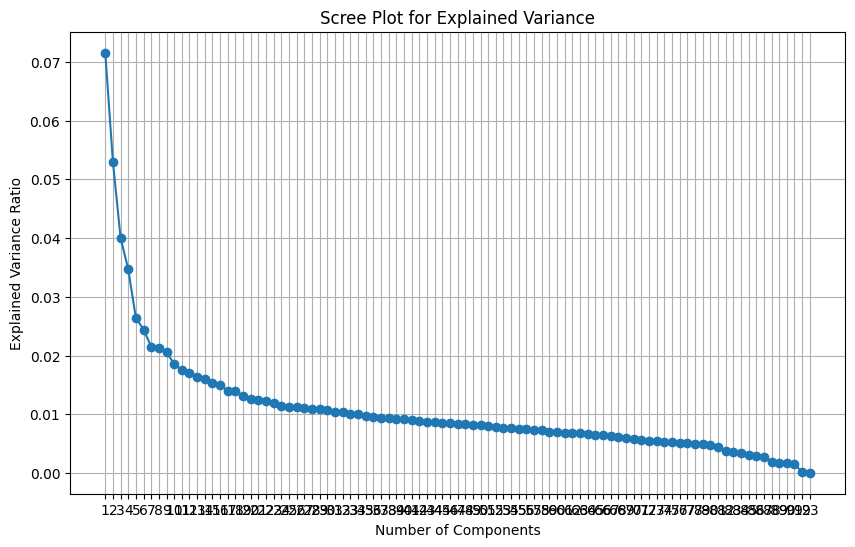

In [ ]:
# Scree Plot for Explained Variance:
    #The plot shows the explained variance of each principal component, which aid in deciding on how many components to retain.

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot for Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

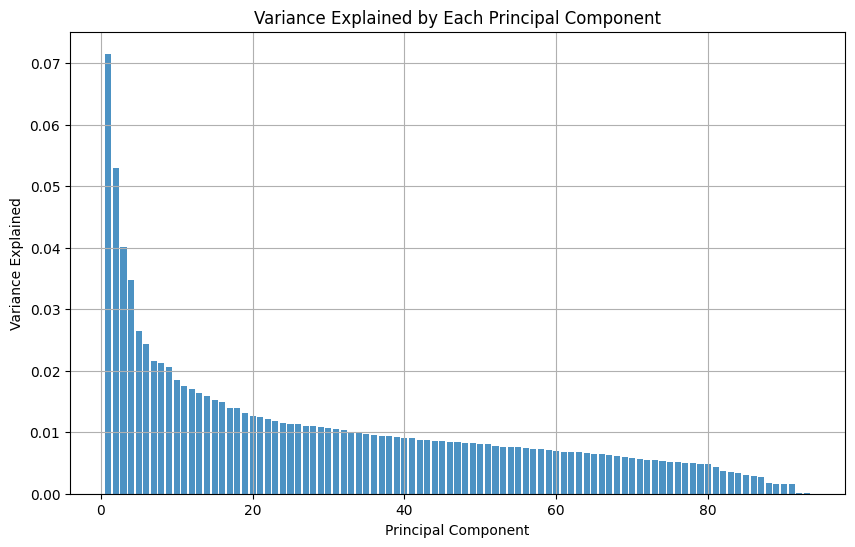

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

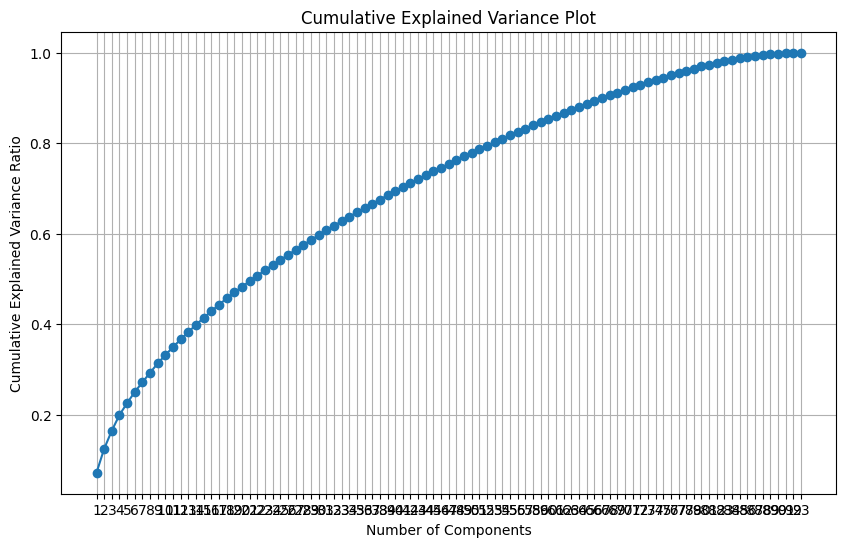

In [ ]:
# Cumulative Explained Variance Plot:
    #This plot shows the cumulative explained variance, aiding in determine the total variance explained by a given number of components

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

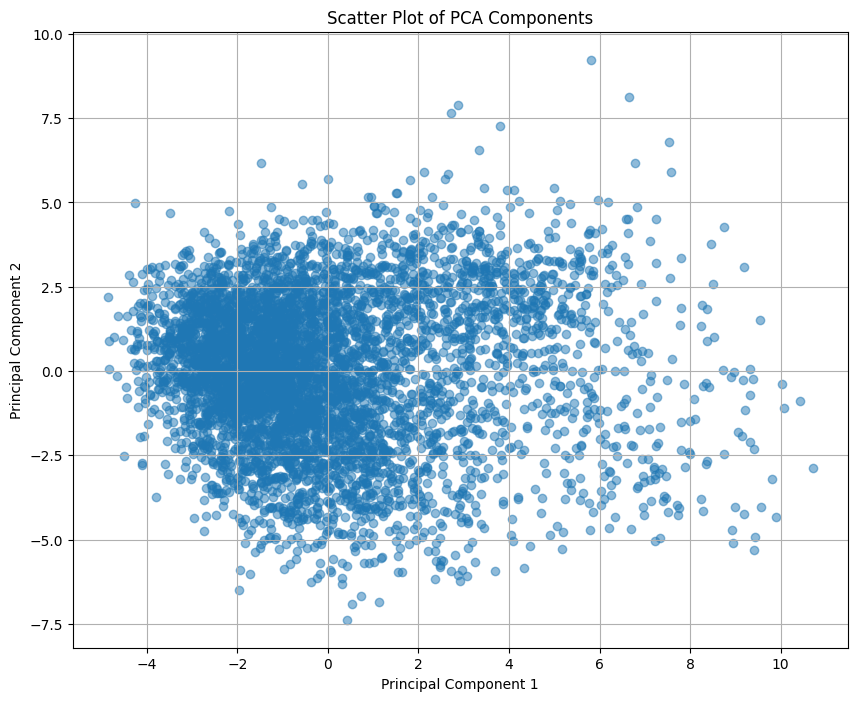

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(merged_dataset_pca[:, 0], merged_dataset_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components')
plt.grid(True)
plt.show()

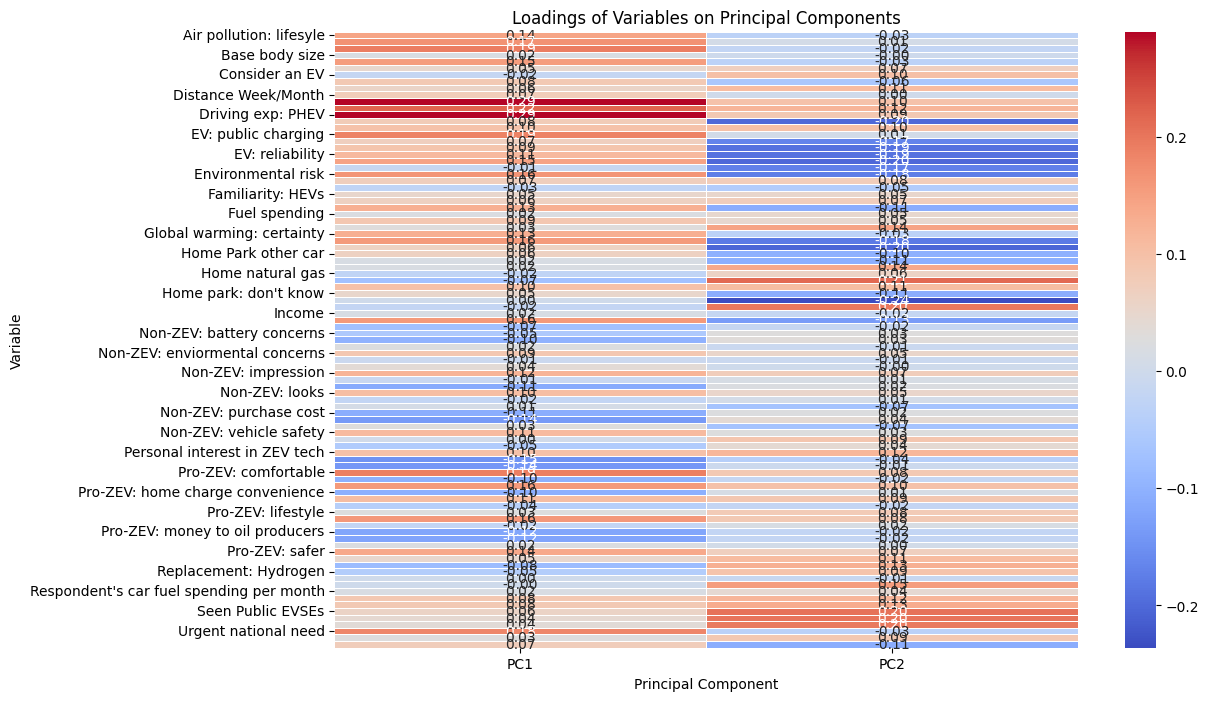

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :2], cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Loadings of Variables on Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variable')
plt.show()

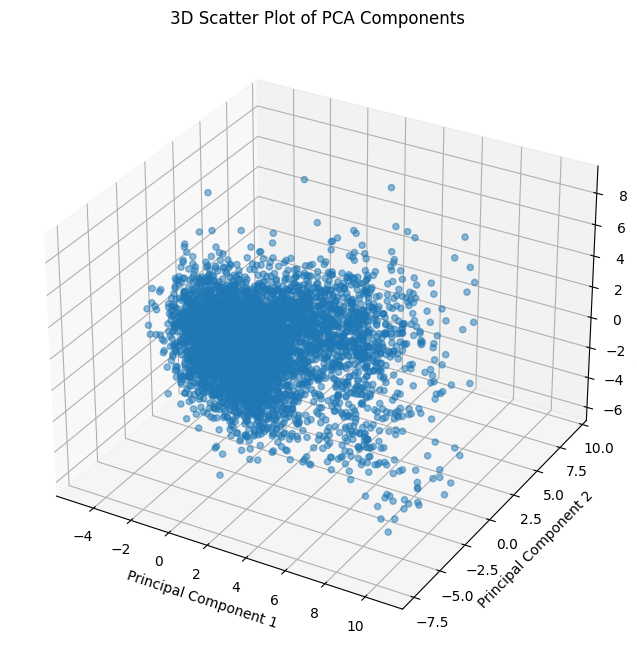

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_dataset_pca[:, 0], merged_dataset_pca[:, 1], merged_dataset_pca[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')
plt.show()

**Kmean clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Initializing lists to store the results
inertia_values = []
silhouette_scores = []

# The range of clusters to try
k_range = range(2, 20)

In [ ]:
# KMeans clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)  # Explicitly set n_init to suppress the warning
    kmeans.fit(merged_dataset_scaled)

    # Calculate inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:
        silhouette_scores.append(silhouette_score(merged_dataset_scaled, kmeans.labels_))


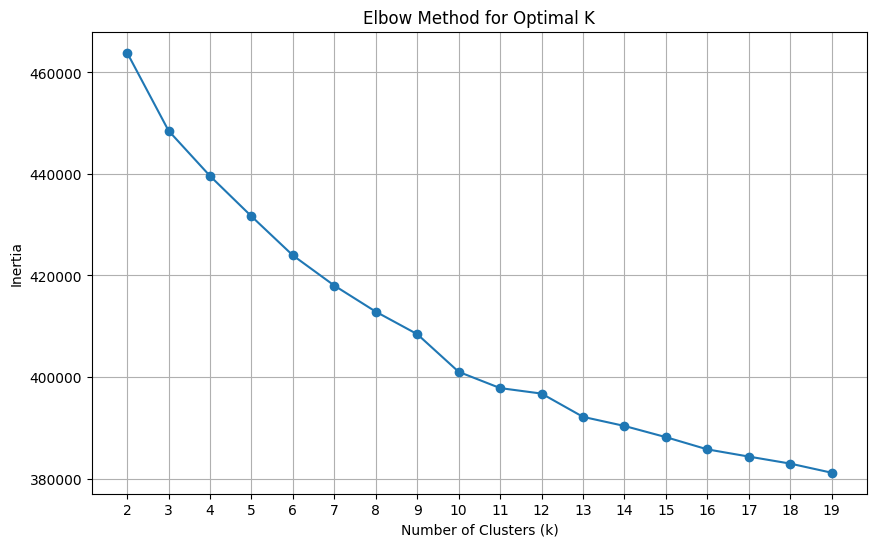

In [ ]:
# Elbow Method Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

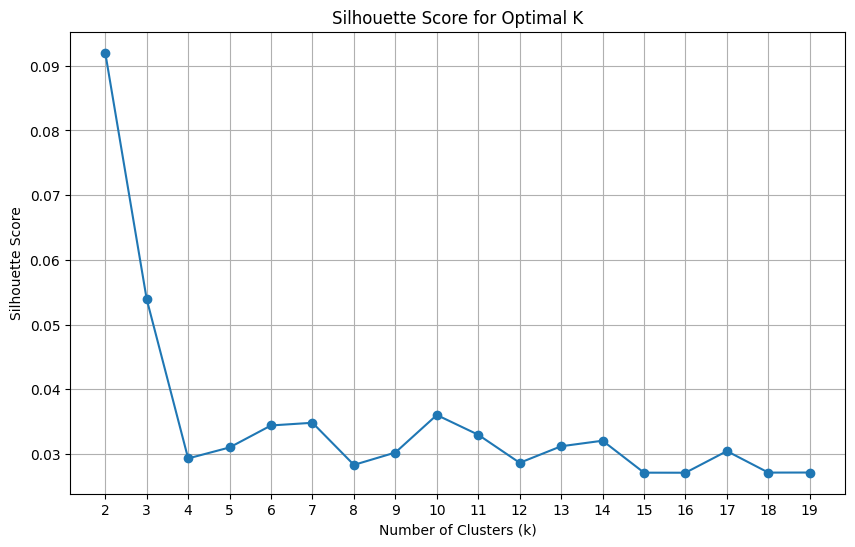

In [ ]:
# Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10,n_init=10 random_state=42)
kmeans.fit(merged_dataset_scaled)

# Adding cluster labels to the original DataFrame
merged_dataset['Cluster'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
merged_dataset

,Response ID,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size,Climate change: lifestyle,Commute,Consider an EV,Daily flexibility,Distance,...,Respondent's vehicle's monthly miles,Respondent's vehicle's monthly miles truncated,Seen Public EVSEs,Seen Public EVSEs yes/no,Should government offer incentives,Urgent national need,First Vehicle Total Price,Do you know First Vehicle Total Price,state,Cluster
0,40,2.300,2.31,2.490,Compact,2.640000e+00,No,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,200.0,...,800.0,800.0,Yes. I've seen them at a few places.,Yes,I'm not sure,0.000,71000.0,0.0,CA,5
1,36,2.940,2.87,1.410,Compact,2.940000e+00,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",35.0,...,140.0,140.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",2.810,21200.0,1.0,CA,1
2,32,2.130,1.69,1.830,Compact,2.240000e+00,Yes,"Shopped for an electric vehicle, including a v...","I'm the only driver, so this question doesn't ...",200.0,...,200.0,200.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",1.750,51000.0,0.0,CA,2
3,48,2.870,2.90,2.940,Large,2.870000e+00,No,I (we) already have a vehicle powered by elect...,I have my car; they have their car. In general...,2500.0,...,2500.0,2500.0,Yes. I've seen them at several places.,Yes,"Yes, but only electricity",2.910,50000.0,0.0,CA,3
4,50,4.125,2.96,4.125,Compact,4.125000e+00,Yes,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",600.0,...,600.0,600.0,No. I haven't seen any.,No,I'm not sure,4.125,26500.0,0.0,CA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,7631,1.600,0.00,-1.280,Midsize,1.550000e+00,No,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",100.0,...,400.0,400.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",1.460,24000.0,0.0,WA,5
5244,7634,2.340,-0.65,-1.990,Compact,9.300000e-01,No,"The idea has occurred, but no real steps have ...",Every day we decide who will drive the car or ...,20.0,...,80.0,80.0,Yes. I've seen them at several places.,Yes,"Yes, both electricity and hydrogen",0.970,25000.0,0.0,WA,2
5245,7638,1.700,1.80,-1.560,Large,1.500000e+00,No,I (we) have not considered buying a vehicle th...,"Each driver has their usual car, but at least ...",500.0,...,500.0,500.0,Yes. I've seen them at a few places.,Yes,"Yes, both electricity and hydrogen",4.125,28768.0,1.0,WA,1
5246,7675,1.480,-1.65,-3.000,Large,2.220446e-16,No,"Started to gather some information, but haven...","Each driver has their usual car, but less than...",1000.0,...,1000.0,1000.0,No. I haven't seen any.,No,"Yes, both electricity and hydrogen",0.760,32000.0,0.0,WA,9


In [ ]:
# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=merged_dataset.columns[:-1])

cluster_centers



In [ ]:
# Distribution of data points in each cluster
cluster_counts = merged_dataset['Cluster'].value_counts().sort_index()

cluster_counts

In [ ]:
charging_station_dataset = pd.read_csv("Alternative_Fueling_Stations_-6669030252532885733.csv")
charging_station_dataset.head()

<ipython-input-6-8691f0b61af3>:1: DtypeWarning: Columns (0,3,4,10,12,13,15,22,26,27,29,31,32,35,37,44,45,46,48,49,50,51,53,54,55,57,58,59,60,61,64,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_station_dataset = pd.read_csv("Alternative_Fueling_Stations_-6669030252532885733.csv")


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude,x,y
0,1,private,NaN,NaN,NaN,4/6/2023 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,FuelMan M V Wright_Exp,8/10/2023 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,9/14/2023 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706,-71.026549,42.374706


In [ ]:
charging_station_dataset["fuel_type_code"].value_counts()

ELEC    108614
E85       4528
LPG       2819
BD        1701
CNG       1401
RD         611
LNG        121
HY         109
Name: fuel_type_code, dtype: int64

Data 2: Understanding the impact of public charging infrastructure on the consideration to purchase an electric vehicle in California -> https://datadryad.org/stash/dataset/doi:10.25338/B8035D

In [ ]:

data2 = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/2211655")

data2.head()

,id,PHEVfamiliarity,BEVfamiliarity,BEVexperience,PHEVexperience,fuelaphev,fuelabev,nameabev,nameaphev,infosearch,...,BEVmassmarket,PHEVpluginathome,PHEVenoughcharging,iPHEVchargetoolong,iPHEVrangetooshort,iPHEVhigherprice,iPHEVgasolinesafer,iPHEVgasolinemorereliable,PHEVenvsdamage,PHEVmassmarket
0,1,-3.0,-1.4,-3.0,-3.0,0,1,1,0,0,...,0.0,-3.0,-3.0,0.0,-3.0,-3.0,-2.9,-3.0,0.0,-1.7
1,2,1.6,1.7,-3.0,-3.0,1,1,0,1,0,...,2.5,-1.5,1.2,0.6,1.2,-1.0,-0.1,0.1,1.7,2.7
2,3,2.0,2.5,-3.0,-3.0,1,1,1,0,0,...,0.5,-3.0,-3.0,-3.0,-3.0,-3.0,-0.5,-0.5,-2.0,1.5
3,4,0.0,0.0,-3.0,-3.0,1,1,0,0,0,...,0.0,-3.0,-3.0,-3.0,-3.0,0.0,0.0,-3.0,3.0,0.0
4,5,1.8,1.5,2.4,2.4,1,0,0,0,0,...,2.2,1.9,0.5,0.5,-2.6,0.6,-2.7,0.7,2.6,-0.4


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2991 non-null   int64  
 1   PHEVfamiliarity            2991 non-null   float64
 2   BEVfamiliarity             2991 non-null   float64
 3   BEVexperience              2991 non-null   float64
 4   PHEVexperience             2991 non-null   float64
 5   fuelaphev                  2991 non-null   int64  
 6   fuelabev                   2991 non-null   int64  
 7   nameabev                   2991 non-null   int64  
 8   nameaphev                  2991 non-null   int64  
 9   infosearch                 2991 non-null   int64  
 10  BEVpositiveconvo           2991 non-null   int64  
 11  PHEVpositiveconvo          2991 non-null   int64  
 12  numofincentives            2991 non-null   int64  
 13  advertaware                2991 non-null   int64

In [ ]:
data2["id"] = data2["id"].astype(str)

##### Demographic Information:
- id: Identifier for each respondent.
- age: Age of the respondent.
- maledummy: Binary variable indicating gender (1 for male, 0 for female).
- Familiarity and Experience:
- PHEVfamiliarity: Level of familiarity with PHEVs.
- BEVfamiliarity: Level of familiarity with BEVs.
- PHEVexperience: Level of experience with PHEVs.
- BEVexperience: Level of experience with BEVs.
##### Attitudes and Behavior:
- fuelaphev: Fuel type familiarity with PHEVs.
- fuelabev: Fuel type familiarity with BEVs.
- nameabev: Brand familiarity with BEVs.
- nameaphev: Brand familiarity with PHEVs.
- infosearch: Level of information search regarding EVs.
- BEVpositiveconvo: Positive conversations about BEVs.
- PHEVpositiveconvo: Positive conversations about PHEVs.
- numofincentives: Number of incentives considered for EV purchase.
- advertaware: Awareness of EV-related advertisements.
- HOVlaneuse: Usage of HOV lanes.
- income: Household income level.
- electricityaccess: Access to electricity.
##### Charging Infrastructure:
- Various columns related to the density of charging infrastructure per capita, at workplaces, and in different areas.
- Market Considerations:
- Columns related to considerations and perceptions regarding charging convenience, vehicle range, pricing, safety, environmental impact, and market feasibility for both BEVs and PHEVs.
##### Consideration of Purchasing:
ordBEVconsider: Ordinal variable indicating the consideration of purchasing a BEV.
- ordPHEVconsider: Ordinal variable indicating the consideration of purchasing a PHEV.
- seeEVSE: Whether the respondent sees electric vehicle supply equipment (EVSE).
